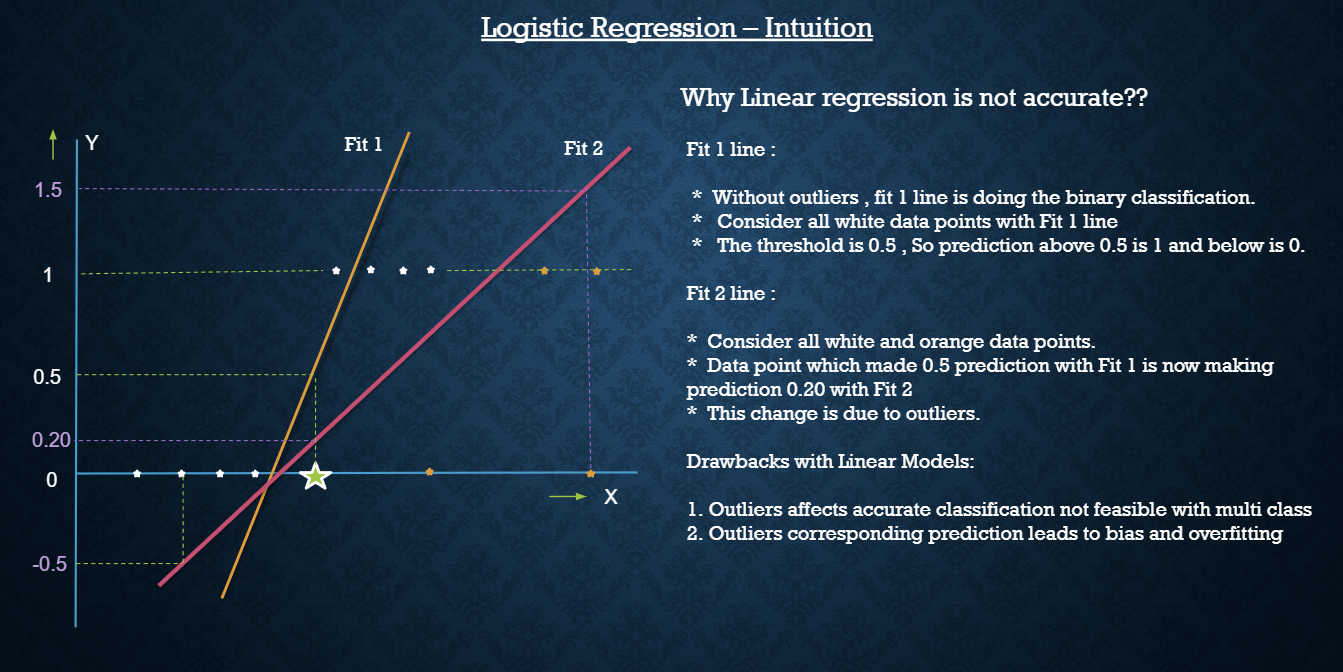

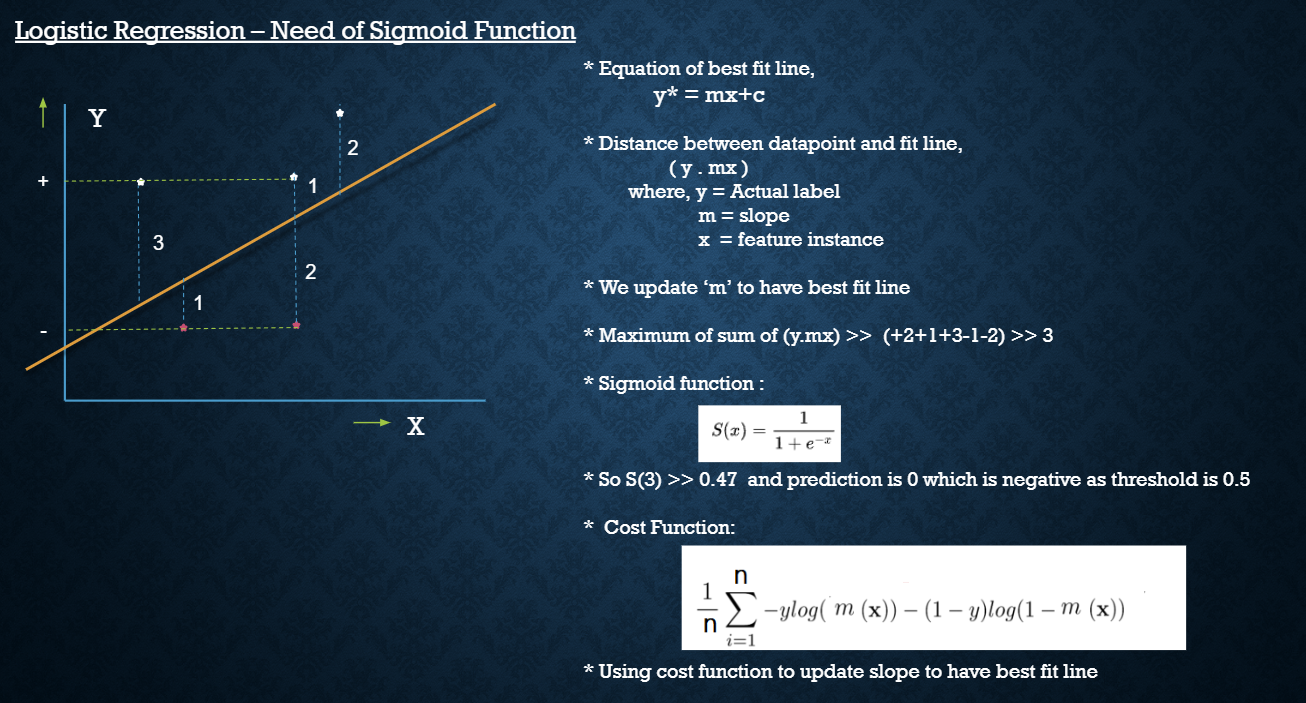

<a href="https://colab.research.google.com/github/natnew/Python-Projects-Predict-Rocket-Launch-Delays-With-Machine-Learning/blob/main/Predict_rocket_launch_delays_with_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARIES

In [1]:
# Pandas library is used for handling tabular data
import pandas as pd

# NumPy is used for handling numerical series operations (addition, multiplication, and ...)

import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data
from sklearn import  metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.linear_model import LogisticRegression

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing


#READ DATA INTO A VARIABLE

In [22]:
launch_data = pd.read_excel('/content/RocketLaunchDataCompleted.xlsx')
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


#EXPLORE DATA

In [23]:
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

#DATA CLEANING

In [24]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

In [26]:
# Removing the columns we are not interested in
launch_data.drop(['Name','Date','Time (East Coast)','Location','Temp at Launch Time','Wind Speed at Launch Time','Hist Ave Max Wind Speed','Hist Ave Visibility','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes'],axis=1, inplace=True)

In [27]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            60 non-null     object 
 1   Launched?                     60 non-null     object 
 2   High Temp                     299 non-null    float64
 3   Low Temp                      299 non-null    float64
 4   Ave Temp                      299 non-null    float64
 5   Hist High Temp                299 non-null    float64
 6   Hist Low Temp                 299 non-null    float64
 7   Hist Ave Temp                 299 non-null    float64
 8   Percipitation at Launch Time  299 non-null    float64
 9   Hist Ave Percipitation        299 non-null    float64
 10  Wind Direction                299 non-null    object 
 11  Max Wind Speed                299 non-null    float64
 12  Visibility                    299 non-null    float64
 13  Condi

In [28]:
## To handle missing values, we will fill the missing values with appropriate values 
launch_data['Launched?'].fillna('N',inplace=True)
launch_data['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
launch_data['Wind Direction'].fillna('unknown',inplace=True)
launch_data['Condition'].fillna('Fair',inplace=True)
launch_data.fillna(0,inplace=True)
launch_data.head()

,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Condition
0,Uncrewed,N,75.0,68.0,71.00,75.0,55.0,65.0,0.0,0.08,E,16.0,15.0,Cloudy
1,Uncrewed,N,78.0,70.0,73.39,75.0,55.0,65.0,0.0,0.09,E,14.0,10.0,Cloudy
2,Uncrewed,Y,73.0,0.0,60.21,75.0,55.0,65.0,0.0,0.09,NE,15.0,10.0,Cloudy
3,Uncrewed,N,76.0,57.0,66.04,75.0,55.0,65.0,0.0,0.08,N,10.0,10.0,Partly Cloudy
4,Uncrewed,N,79.0,60.0,70.52,75.0,55.0,65.0,0.0,0.09,E,12.0,10.0,Partly Cloudy


#SEE CHANGES MADE TO THE DATA

In [29]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    object 
 1   Launched?                     300 non-null    object 
 2   High Temp                     300 non-null    float64
 3   Low Temp                      300 non-null    float64
 4   Ave Temp                      300 non-null    float64
 5   Hist High Temp                300 non-null    float64
 6   Hist Low Temp                 300 non-null    float64
 7   Hist Ave Temp                 300 non-null    float64
 8   Percipitation at Launch Time  300 non-null    float64
 9   Hist Ave Percipitation        300 non-null    float64
 10  Wind Direction                300 non-null    object 
 11  Max Wind Speed                300 non-null    float64
 12  Visibility                    300 non-null    float64
 13  Condi

#DATA MANIPULATION

In [30]:
## As part of the data cleaning process, we have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

In [31]:
launch_data.head()

,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Condition
0,1,N,75.0,68.0,71.00,75.0,55.0,65.0,0.0,0.08,0,16.0,15.0,0
1,1,N,78.0,70.0,73.39,75.0,55.0,65.0,0.0,0.09,0,14.0,10.0,0
2,1,Y,73.0,0.0,60.21,75.0,55.0,65.0,0.0,0.09,2,15.0,10.0,0
3,1,N,76.0,57.0,66.04,75.0,55.0,65.0,0.0,0.08,1,10.0,10.0,6
4,1,N,79.0,60.0,70.52,75.0,55.0,65.0,0.0,0.09,0,12.0,10.0,6


In [32]:
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Crewed or Uncrewed            300 non-null    int64  
 1   Launched?                     300 non-null    object 
 2   High Temp                     300 non-null    float64
 3   Low Temp                      300 non-null    float64
 4   Ave Temp                      300 non-null    float64
 5   Hist High Temp                300 non-null    float64
 6   Hist Low Temp                 300 non-null    float64
 7   Hist Ave Temp                 300 non-null    float64
 8   Percipitation at Launch Time  300 non-null    float64
 9   Hist Ave Percipitation        300 non-null    float64
 10  Wind Direction                300 non-null    int64  
 11  Max Wind Speed                300 non-null    float64
 12  Visibility                    300 non-null    float64
 13  Condi

#FURTHER CLEANING

In [33]:
# First, we save the output we are interested in. In this case, "launch" yes and no's go into the output variable.
y = launch_data['Launched?']

# Saving the rest of the data as input data
X = launch_data.drop(['Launched?'],axis=1)

In [34]:
# List of variables that our machine learning algorithm is going to look at:
X.columns

Index(['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility', 'Condition'],
      dtype='object')

Can you predict whether a launch is likely to happen given specific weather conditions? 

#SPLIT DATA INTO TRAIN AND TEST DATA

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

#FIT THE MODEL

In [36]:
from sklearn.metrics import *

In [ ]:
# create the model
logistic_reg = LogisticRegression()
# fit the model on the training set
logistic_reg.fit(X_train, y_train)
# make predictions on the test set
predictions = logistic_reg.predict(X_test)

#TEST THE MODEL

In [40]:
# evaluate the model performance using accuracy metric
print("Accuracy: %.2f" % accuracy_score(y_test, predictions))

Accuracy: 0.82
